In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [17]:
DATASET_PATH = "../data/raw/"

TRAIN = "train/"
TEST = "test/"

INPUT_SIGNAL_TYPES = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z"
]

In [18]:
LABELS = [
    "Walking",
    "Upstairs",
    "Downstairs",
    "Sitting",
    "Standing",
    "Laying"
]

## Load Dataset

In [19]:
X_train_signals_paths = [
    DATASET_PATH + TRAIN + "Inertial Signals/" + signal + "_train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    DATASET_PATH + TEST + "Inertial Signals/" + signal + "_test.txt" for signal in INPUT_SIGNAL_TYPES
]

In [20]:
def load_X(X_signals_paths):
    X_signals = []
    for signal_type_path in X_signals_paths:
        # Read dataset from disk, dealing with text files' syntax
        with open(signal_type_path, 'r') as file:
            X_signals.append([np.array(serie, dtype=np.float32) for serie in [row.replace('  ', ' ').strip().split(' ') for row in file]])
    return np.transpose(np.array(X_signals), (1, 2, 0))

In [21]:
X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)

In [22]:
y_train_path = DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + TEST + "y_test.txt"

In [23]:
def load_y(y_path):
    # Read dataset from disk, dealing with text file's syntax
    with open(y_path, 'r') as file:
        y_ = np.array([elem for elem in [row.replace('  ', ' ').strip().split(' ') for row in file]],dtype=np.int32)
    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

In [24]:
y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [25]:
X_train.shape, y_train.shape

((7352, 128, 9), (7352, 1))

In [26]:
X_test.shape, y_test.shape

((2947, 128, 9), (2947, 1))

## Data Exploration

In [27]:
sns.set_theme(style="ticks")

In [28]:
y_train_ = pd.DataFrame(y_train, columns=["Activity"])

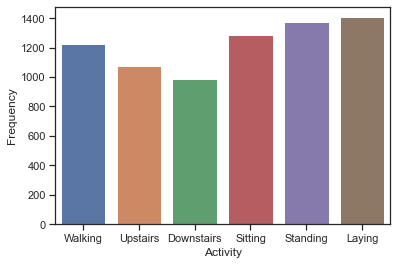

In [29]:
ax = sns.countplot(x="Activity", data=y_train_)
ax.set_xticklabels(LABELS)
ax.set_ylabel("Frequency")
plt.show()

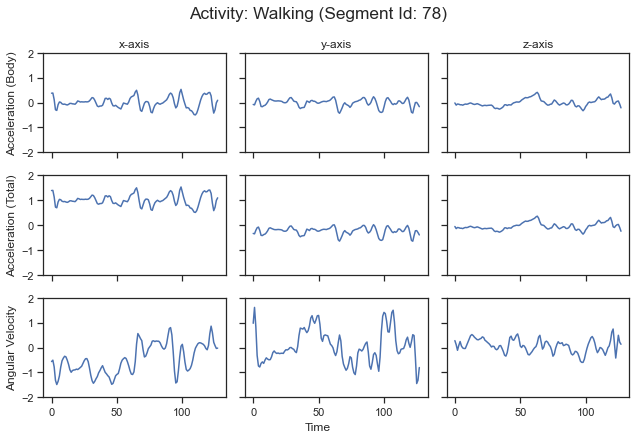

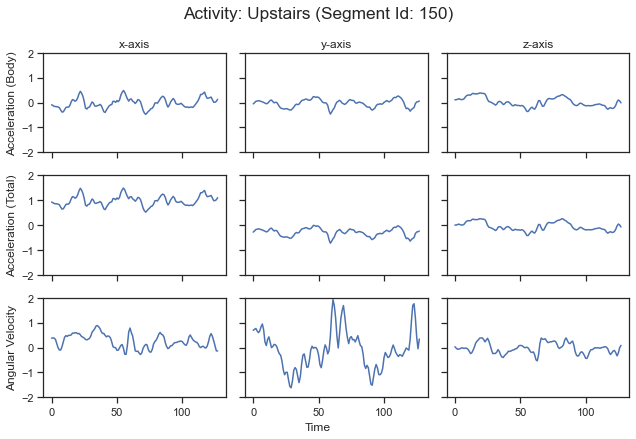

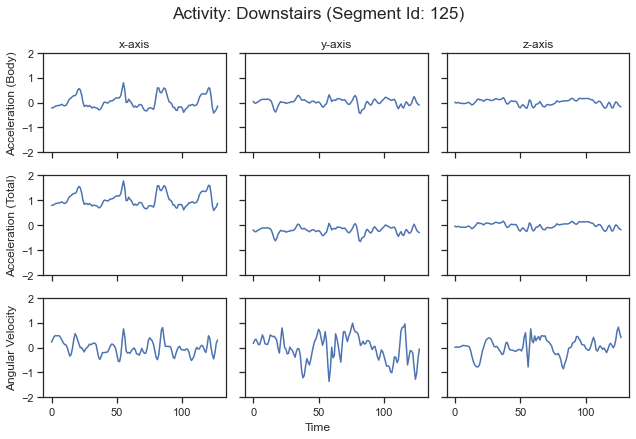

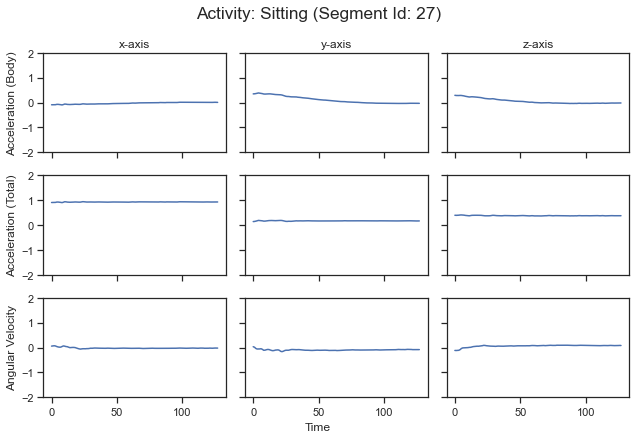

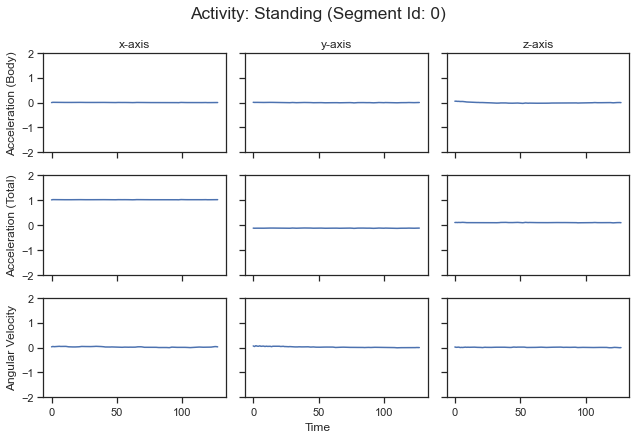

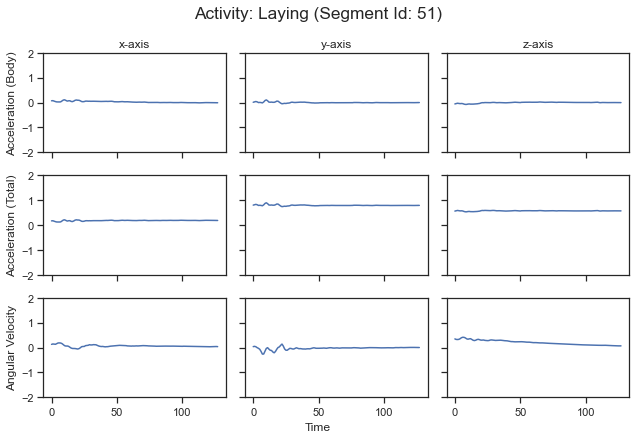

In [31]:
for i, label in enumerate(LABELS):
    idx = np.where(y_train == i)[0][0]
    X_train_ = pd.DataFrame(X_train[idx, ], columns=INPUT_SIGNAL_TYPES)
    X_train_["Time"] = np.arange(128)
    rows = ["Acceleration (Body)", "Acceleration (Total)", "Angular Velocity"]
    cols = ["x-axis", "y-axis", "z-axis"]
    fig, axes = plt.subplots(3, 3, sharex=True, sharey="row", figsize=(9, 6))
    for i, feature in enumerate(INPUT_SIGNAL_TYPES):
        g = sns.lineplot(x="Time", y=feature, data=X_train_, ax=axes[i // 3, i % 3])
        g.set(xlabel=None, ylabel=None if i % 3 else rows[i // 3], ylim=(-2, 2))
        g.title.set_text(cols[i] if i < 3 else None)
    fig.text(0.5, 0, "Time", ha="center")
    fig.suptitle("Activity: {label} (Segment Id: {id})".format(label=label, id=idx), fontsize="x-large")
    plt.tight_layout()
    plt.savefig("../reports/images/activity-{label}-segment-{id}.eps".format(label=label.lower(), id=idx), format="eps")